# 차원감소와 PCA 분석
- 출처: http://bcho.tistory.com/1209?category=555440 [조대협의 블로그]

<b>PCA</b>, 변수의 특성을 가장 잘 반영하는 분산이 큰 축을 기준으로 데이터를 재설명? 재정의? 하는 것 (급, 내가 생각하고 있던 PCA)

In [8]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

- Create scaler: scaler

In [4]:
scaler = StandardScaler()

- Create a PCA instance : pca

In [5]:
pca = PCA()

- Create pipeline : pipeline 

In [7]:
pipeline = make_pipeline(scaler,pca)

- Fit the pipeline to 'samples'

In [13]:
pipeline.fit(data)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

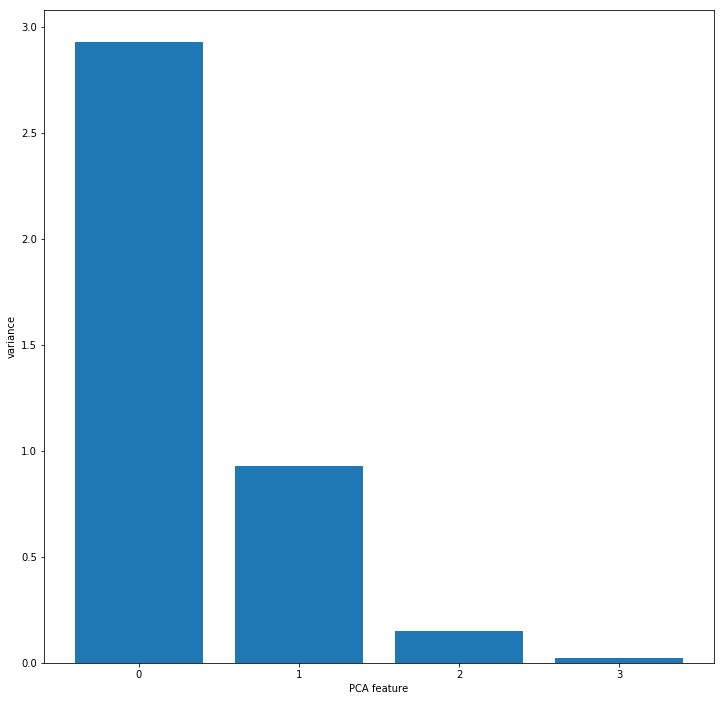

In [15]:
features = range(pca.n_components_)

fig = plt.figure( figsize=(12,12))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

- 위를 보면, PCA분석에 의해서 변환된 피쳐 0과 1의 Variation이 큰석을 확인할 수 있다.
- 그래서 PCA 변환된 피쳐중 0,1 번 피쳐만 사용해서 시각화를 해보면 다음과 같다

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]

In [46]:
xf.shape

(150,)

In [47]:
yf.shape

(150,)

In [56]:
np.array(labels).reshape(150)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

급, 역시 datatype 은 중요해 ㅎ, shape이랑

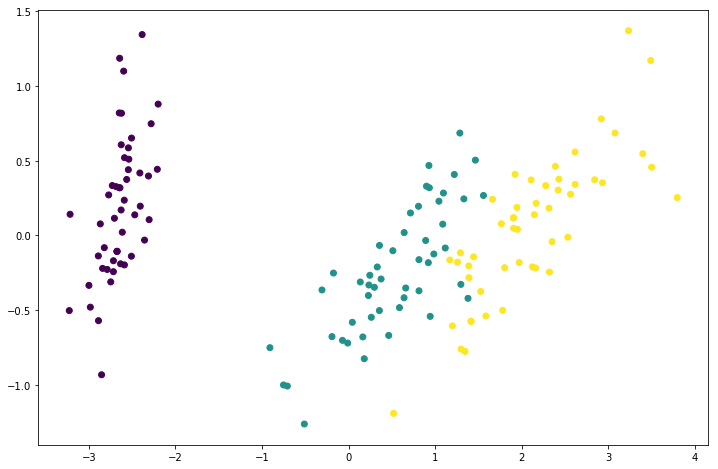

In [57]:
fig = plt.figure( figsize=(12,8))
plt.scatter(xf,yf,c=np.array(labels).reshape(150));
plt.show();

-----

# t-SNE를 이용한 차원감소
- 출처: http://bcho.tistory.com/1210?category=555440 [조대협의 블로그]

### PCA 기반 차원 감소의 문제점 
- PCA의 경우 선형 분석 방식으로 값을 사상하기 때문에 차원이 감소되면서 군집화 되어 있는 데이터들이 뭉게져서 제대로 구별할 수 없는 문제를 가지고 있다. 

### t-SNE
- 이런 문제를 해결하기 위한 차원 감소 방법으로는 t-SNE(티스니라고 읽음) 방식이 있는데, 대략적인 원리는 다음과 같다. <br>
- 먼저 점을 하나 선택한다. 아래는 검정색점을 선택했는데, 이 점에서 부터 다른점까지의 거리를 측정한다.

<img src='picture/t-SNE 설명.png' />

- 다음은 T분포 그래프를 이용하여, 검정점(기준점)을 T분포 상의 가운데 위치한다면, 기준점으로부터 상대점까지 거리에 있는 T분포의 값을 선택 <br> (위의 T분포 그래프에서 파란점에서 위로 점선이 올라가서 T분포 그래프상에 붉은색으로 X표시가 되어 있는 값) <br>
하여, 이 값을 친밀도 (Similarity)로 하고, 이 친밀도가 가까운 값끼리 묶는다. <br>
이 경우 PCA 처럼 군집이 중복되지 않는 장점은 있지만, 매번 계산할 때 마다 축의 위치가 바뀌어서, 다른 모양으로 나타난다. 단 데이터의 군집성과 같은 특성들은 유지되기 때문에 <b>시각화를 통한 데이터 분석에는 유용하지만, 매번 값이 바뀌는 특성으로 인하여, 머신러닝 모델의 학습 피쳐로 사용하기는 다소 어려운점이 있다.</b> <br>

-----

In [59]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(feature)

xs = transformed[:,0]
ys = transformed[:,1]

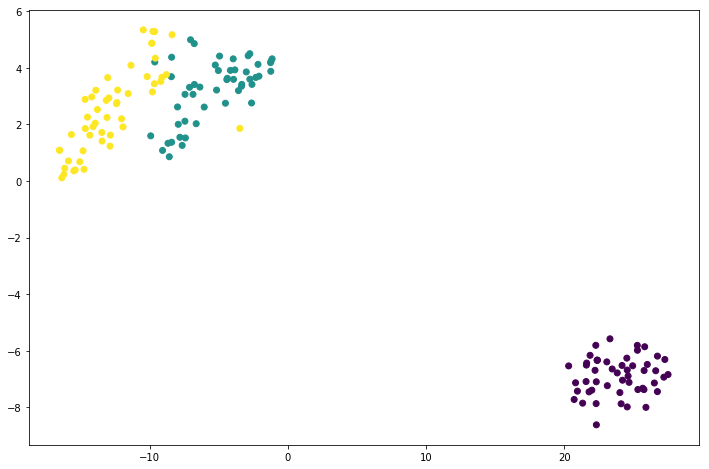

In [70]:
fig = plt.figure(figsize=(12,8))
plt.scatter(xs,ys,c=np.array(labels).reshape(150))
plt.show()

- 조대협님 왈, <br>
사실 코드가 너무 간단해서 설명할 것이 없다. TSNE 객체를 선언하고 학습속로(Learning rate)를 지정한 다음 fit_transform하면 끝이다. (싸이킷런 만세...) 